## General Information

Team Compositions in Dota2 explored the idea that hero selection affected the win rate primarily using Logistic Regression Models

#### To simplify you navigation through this kernel:
    
    *Change to your own path in order to read the csv file*
    
    Main data exploration:
        1: Evaulation of 'Synergy' Feature Alone
        2: Evaulation of 'Counter' Feature Alone
        3: Evaluation of both "Synergy" & "Counter" Feature 
            -Classification Accuracy
            -F-Measure
            -Logarithmic Loss
            -Area under curve (AUC)

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
matches = pd.read_csv('match.csv')
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
# print(matches)
classes = ['Dire Win', 'Radiant Win']
hero_selection = pd.read_csv('mapped_match_hero.csv')
# print(hero_selection)
df_between_hero_synergy = pd.read_csv("df_between_hero_synergy.csv")
# df_between_hero_synergy

In [2]:
X = hero_selection.merge(df_between_hero_synergy.df_between_hero_synergy, left_index=True, right_index=True)
X.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,df_between_hero_synergy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.071145
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.856811
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.425840
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.501305
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,-0.172906


In [3]:
X.columns

Index(['radiant_Abaddon', 'radiant_Alchemist', 'radiant_Ancient Apparition',
       'radiant_Anti-Mage', 'radiant_Axe', 'radiant_Bane', 'radiant_Batrider',
       'radiant_Beastmaster', 'radiant_Bloodseeker', 'radiant_Bounty Hunter',
       ...
       'dire_Viper', 'dire_Visage', 'dire_Warlock', 'dire_Weaver',
       'dire_Windranger', 'dire_Winter Wyvern', 'dire_Witch Doctor',
       'dire_Wraith King', 'dire_Zeus', 'df_between_hero_synergy'],
      dtype='object', length=223)

## 2. Predictive Modelling (Logistic Regression)

In [5]:
# First, we import python libraries which we will use for modelling and visualing the final model:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1=pd.DataFrame(scaler.transform(X),columns=X.columns)
X1.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,df_between_hero_synergy
0,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.119532
1,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,4.524206,-1.558533
2,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-0.779188
3,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,5.137826,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-0.915655
4,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,1.932924,-0.287529,-0.28145,-0.290373,4.524206,-0.321797


In [8]:
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state =seed)

In [9]:
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X1, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy -val set: 66.97% (0.01)


In [10]:
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.25, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 67.00%


### Evaulation of 'Counter' Feature Alone

In [12]:
df_between_counter_rate = pd.read_csv("df_between_counter_rate1.csv")

In [13]:
X2 = hero_selection.merge(df_between_counter_rate['diff_counter'], left_index=True, right_index=True)
X2.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.033715
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.002285
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.049158
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.005308
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.031996


In [14]:
scaler = StandardScaler()
scaler.fit(X2)
X3=pd.DataFrame(scaler.transform(X2),columns=X2.columns)
X3.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter
0,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.893963
1,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,4.524206,-0.062968
2,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-1.308931
3,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,5.137826,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.138878
4,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,1.932924,-0.287529,-0.28145,-0.290373,4.524206,0.848292


In [15]:
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X3, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy -val set: 67.54% (0.01)


In [16]:
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y, test_size=0.25, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 67.89%


### The classification accuracy is improving from 67.54% (Predicting win using Hero Selection) to 67.89% with Counter rate

### Evaluation of both "Synergy" & "Counter" Feature 

In [17]:
X_final = pd.read_csv("final_dataset.csv")

In [19]:
scaler = StandardScaler()
scaler.fit(X_final)
X_final=pd.DataFrame(scaler.transform(X_final),columns=X_final.columns)
X_final.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter,df_between_hero_synergy
0,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.893963,0.119532
1,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,4.524206,-0.062968,-1.558533
2,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-1.308931,-0.779188
3,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.138878,-0.915655
4,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,1.932924,-0.287529,-0.28145,-0.290373,4.524206,0.848292,-0.321797


In [20]:
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_final, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy -val set: 71.76% (0.01)


#### The classification accuracy is 71.76% on the validation set.

In [21]:
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_final, y, test_size=0.25, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 72.07%


### The classification accuracy is improving from 67.54% (Predicting win using Hero Selection) to 72.07% 

### F1-Measure

In [22]:
predictions = model.predict(X_test)
predictions
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Precision: 0.725546
Recall: 0.745505
F1 score: 0.735390


### Logarithmic Loss

In [23]:
from sklearn.metrics import log_loss
accuracy = log_loss(y_test, predictions)
print("Logloss: %.2f" % (accuracy))

Logloss: 9.65


### Area under Curve (AUC)

AUC - Test Set: 79.23%


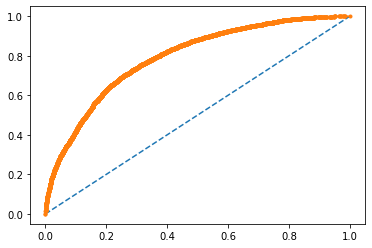

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()